<div style="text-align: center;">
    <h1>||  TRABALHO DE MANIPULAÇÃO DE IMAGENS  ||</h1>
    <h2><b>Aluno:</b> Kennyo Wescley Elias Cavalcante</h2>
    <h2><i>Prof.</b> Leonardo</h2>
    <h2><b>Introdução ao Processamento Digital de Imagens</b></h2>
</div>

**OBJETIVO:** Desenvolver um sistema para abrir, exibir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel). O
sistema deve ter a funcionalidade necessária para efetuar as operações de aumento de dados especificadas a seguir.

In [99]:
# Bibliotecas essenciais
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from PIL import Image

In [2]:
#Importando o conjunto de dados do CIFAR - 10 em https://paperswithcode.com/dataset/cifar-10 // 10 - 6000

from tensorflow.keras.datasets import cifar10 # carregadas como arrays NumPy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Quantitativo de Imagens e Classes

In [3]:
# Contando o número total de imagens
train_count = x_train.shape[0]
test_count = x_test.shape[0]
total_count = train_count + test_count

# Mapear o índice da classe para o nome das 10 Classes (de 0 a 9)
class_names = [
    'avião', 'automóvel', 'pássaro', 'gato', 'veado',
    'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

print(f"Quantidade total de imagens: {total_count}")
print(f"Quantidade de imagens de treino: {train_count}")
print(f"Quantidade de imagens de teste: {test_count}")
print(f"Quantidade de classes: {len(class_names)}")

Quantidade total de imagens: 60000
Quantidade de imagens de treino: 50000
Quantidade de imagens de teste: 10000
Quantidade de classes: 10


## Impressão de Imagens

Tipo de dado da imagem: <class 'numpy.ndarray'>
Formato da imagem: (32, 32, 3)


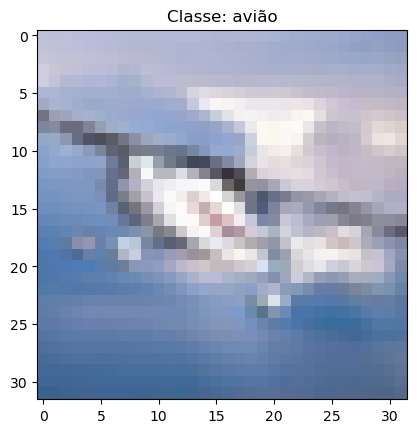

In [6]:
# Pegue uma imagem aleatória do conjunto de treinamento
random_index = random.randint(0, x_train.shape[0] - 1)
random_image = x_train[random_index]  # A imagem é um array NumPy
random_label = y_train[random_index][0]  # A classe é um valor inteiro

# Referência à classe específica
label_name = class_names[random_label]

# Verificar o tipo e formato da imagem
print(f"Tipo de dado da imagem: {type(random_image)}")
print(f"Formato da imagem: {random_image.shape}")

# Exibir a imagem redimensionada
plt.imshow(random_image)
plt.title(f"Classe: {label_name}")
plt.axis('on')
plt.show()

(32, 32, 3)


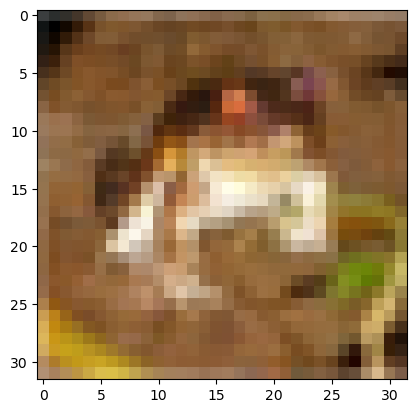

In [7]:
# Imagem direta do índice
print(x_train[0].shape)
plt.imshow(x_train[0])  # Para imagens RGB, deve funcionar normalmente
plt.axis('on')
plt.show()

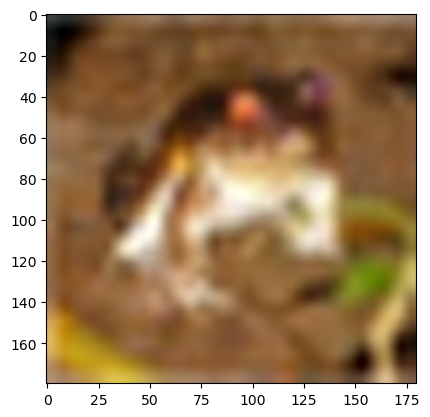

In [10]:
# Redimensionar a imagem para melhor visualização
img_height = 180
img_width = 180

# Redimensionar a imagem para melhor visualização
resized_image = cv2.resize(x_train[0], (img_width, img_height), interpolation=cv2.INTER_CUBIC)

# Exibir a imagem redimensionada
plt.imshow(resized_image)
plt.axis('on')  # Exibe os eixos
plt.show()

## Carregar dados usando um utilitário Keras

In [11]:
from keras.utils import to_categorical #Conversão em on-hot enconding: Representar variáveis categóricas em forma de vetores binários
y_train[0:11]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4]], dtype=uint8)

In [12]:
# Parâmetros para a criação de um conjunto de dados
batch_size = 32 #número de amostras de dados a serem processadas em cada passo de treinamento.

In [13]:
# Normalizar os dados para valores entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
# Garantir que y_train e y_test sejam 1D
y_train = y_train.flatten()  # Garantir que y_train seja um vetor 1D
y_test = y_test.flatten()    # Garantir que y_test seja um vetor 1D

In [15]:
# Converter os rótulos para one-hot encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [16]:
for i, class_name in enumerate(class_names):
    print(f"N.{i}: {class_name} ||", end=" ")

N.0: avião || N.1: automóvel || N.2: pássaro || N.3: gato || N.4: veado || N.5: cachorro || N.6: sapo || N.7: cavalo || N.8: navio || N.9: caminhão || 

In [17]:
# Imprimir os primeiros 10 exemplos + classes:
for i in range(10):
    print(f"Imagem {i}: One-hot encoding: {y_cat_train[i]}")
    print('-' * 30)

Imagem 0: One-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
------------------------------
Imagem 1: One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
------------------------------
Imagem 2: One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
------------------------------
Imagem 3: One-hot encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------
Imagem 4: One-hot encoding: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------
Imagem 5: One-hot encoding: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------
Imagem 6: One-hot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------
Imagem 7: One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------------------
Imagem 8: One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
------------------------------
Imagem 9: One-hot encoding: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
------------------------------


## Visualização dos Dados

In [97]:
# Redimensionar a imagem para melhor visualização
img_height = 64
img_width = 64

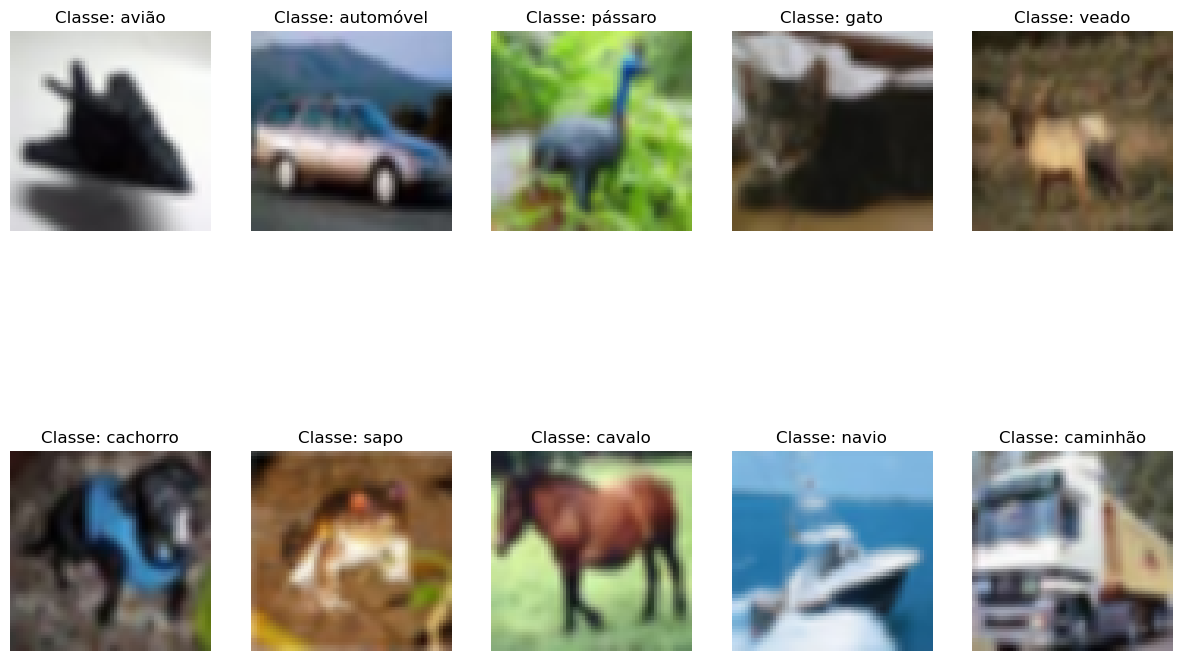

In [98]:
# Inicializando a figura
plt.figure(figsize=(15, 10))

# Iterar pelas 10 classes (0 a 9)
for i in range(10):
    # Filtrar as imagens de cada classe
    class_images = x_train[y_train.flatten() == i]
    
    # Verificar se existem imagens dessa classe
    if class_images.size > 0:
        # Pegar a primeira imagem da classe
        image = class_images[0]
        
        # Redimensionar a imagem para o tamanho desejado (usando tensorflow)
        resized_image = tf.image.resize(image, [img_height, img_width]).numpy()
        
        # Certificar-se de que a imagem é do tipo uint8
        resized_image = resized_image.astype("uint8")
        
        # Plotar a imagem
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(resized_image)
        plt.title(f"Classe: {class_names[i]}")
        plt.axis("off")
    else:
        print(f"A classe {class_names[i]} não contém imagens.")

# Mostrar as imagens
plt.show()

##  Configurando o Conjunto para Treino e Validação

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

## Padronização dos Dados

## Criando o Modelo

In [28]:
# Construção do modelo aprimorado
model = Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    # Bloco de Convolução 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Bloco de Convolução 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Bloco de Convolução 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    
    # Camada totalmente conectada
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Saída para 10 classes
])

## Compilar o Modelo

In [29]:
# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Sumário

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Treinando o Modelo

In [22]:
# Verificar a quantidade de dados após a divisão
print(f"Tamanho de x_train: {x_train.shape[0]}")
print(f"Tamanho de y_train: {y_train.shape[0]}")
print(f"Tamanho de y_cat_train: {y_cat_train.shape[0]}")
print(f"Tamanho de y_cat_test: {y_cat_test.shape[0]}")
print(f"y_train valores únicos: {np.unique(y_train)}")  # Deve conter inteiros representando as classes

Tamanho de x_train: 50000
Tamanho de y_train: 50000
Tamanho de y_cat_train: 50000
Tamanho de y_cat_test: 10000


In [33]:
# #epochs=10 #Executar várias épocas permite que o modelo aprenda melhor os padrões dos dados de treinamento.
# # #número de vezes que o modelo passará por todo o conjunto de dados de treinamento durante o processo de treinamento.
# # Treinamento do modelo com aumento de dados
# history = model.fit(
#     datagen.flow(x_train, y_cat_train, batch_size=32),
#     epochs=10,  # Aumentar o número de épocas
#     validation_data=(x_test, y_cat_test)
# )

In [42]:
history = model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.8389 - loss: 0.4716
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.8430 - loss: 0.4466
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.8545 - loss: 0.4186
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8549 - loss: 0.4198
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8658 - loss: 0.3924
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8640 - loss: 0.3875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8697 - loss: 0.3709
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.8730 - loss: 0.3625
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.8773 - loss: 0.3548
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 484s 310ms/step - accuracy: 0.8827 - loss: 0.3390


## Visualizando os dados do Treinamento

In [43]:
model.metrics_names

['loss', 'compile_metrics']

In [44]:
# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_cat_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8590 - loss: 0.4253
Test Accuracy: 85.59%


In [45]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [46]:
# Relatório de classificação
print(classification_report(y_test.flatten(), predictions, target_names=class_names))

              precision    recall  f1-score   support

       avião       0.89      0.84      0.86      1000
   automóvel       0.92      0.95      0.93      1000
     pássaro       0.83      0.78      0.80      1000
        gato       0.70      0.75      0.73      1000
       veado       0.86      0.84      0.85      1000
    cachorro       0.77      0.81      0.79      1000
        sapo       0.83      0.92      0.87      1000
      cavalo       0.92      0.88      0.89      1000
       navio       0.95      0.89      0.92      1000
    caminhão       0.92      0.91      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Aumento dos Dados

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#Visualização
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Aumento de Dados - Diretório

In [85]:
# Função para criar diretórios
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Caminhos das pastas
output_folder = "cifar10_augmented_data"
create_dir(output_folder)

# Funções

In [123]:
# Diretório base onde as pastas serão criadas
base_dir = "cifar10_images"
os.makedirs(base_dir, exist_ok=True)

# Garantir que y_train seja um vetor 1D
y_train = y_train.flatten()

# Criar pastas e salvar imagens para cada classe
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    
    # Filtrar as imagens de cada classe
    class_images = x_train[y_train == i]
    
    # Salvar as imagens da classe em arquivos individuais
    for j, img in enumerate(class_images):
        img_path = os.path.join(class_dir, f"{class_name}_{j}.png")
        img = Image.fromarray(img)
        img.save(img_path)



print(f"Imagens salvas na pasta: {base_dir}")


Imagens salvas na pasta: cifar10_images


In [124]:
def save_flipped_images(source_dir, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        flipped_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(flipped_class_dir, exist_ok=True)
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            
            # Aplicar o flip horizontal
            flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
            
            # Salvar a imagem flipada
            flipped_img_path = os.path.join(flipped_class_dir, img_name)
            flipped_img.save(flipped_img_path)

# Pasta original e pasta de destino para as imagens flipadas
flipped_dir = "cifar10_images_flipped"
save_flipped_images(base_dir, flipped_dir)

print(f"Imagens flipadas salvas na pasta: {flipped_dir}")


KeyboardInterrupt: 

In [ ]:
def save_random_rotated_images(source_dir, target_dir):
    """
    Gera imagens rotacionadas aleatoriamente entre os valores específicos de graus
    e salva as imagens no diretório de destino.
    
    Args:
    - source_dir: Diretório das imagens originais.
    - target_dir: Diretório para salvar as imagens rotacionadas.
    """
    os.makedirs(target_dir, exist_ok=True)
    
    # Lista de ângulos específicos para a rotação
    rotation_angles = [1, 5, 10, 15, 25, 45, 90]
    
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        rotated_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(rotated_class_dir, exist_ok=True)
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            
            # Escolher um ângulo aleatório da lista definida
            angle = random.choice(rotation_angles)
            
            # Aplicar a rotação com preenchimento em preto (RGB=(0,0,0))
            rotated_img = img.rotate(angle, resample=Image.BICUBIC, fillcolor=(0, 0, 0))
            
            # Salvar a imagem rotacionada
            rotated_img_path = os.path.join(rotated_class_dir, img_name)
            rotated_img.save(rotated_img_path)

# Exemplo de uso
base_dir = "cifar10_images"  # Diretório original com imagens
rotated_dir = "cifar10_images_rotated"  # Diretório de saída

save_random_rotated_images(base_dir, rotated_dir)

print("Imagens rotacionadas aleatoriamente salvas com sucesso!")


In [ ]:

def save_random_zoomed_images(source_dir, target_dir):
    """
    Aplica um zoom aleatório entre os valores específicos e salva as imagens com zoom no diretório de destino.
    
    Args:
    - source_dir: Diretório das imagens originais.
    - target_dir: Diretório para salvar as imagens com zoom.
    """
    os.makedirs(target_dir, exist_ok=True)
    
    # Lista de fatores de zoom (em porcentagem)
    zoom_factors = [1.05, 1.10, 1.20, 1.40, 1.80]  # Correspondente a 5%, 10%, 20%, 40%, 80%
    
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        zoomed_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(zoomed_class_dir, exist_ok=True)
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            
            # Escolher um fator de zoom aleatório da lista
            zoom_factor = random.choice(zoom_factors)
            
            # Obter as dimensões originais da imagem
            original_width, original_height = img.size
            
            # Aplicar o zoom (redimensionar)
            zoomed_img = img.resize(
                (int(original_width * zoom_factor), int(original_height * zoom_factor)),
                resample=Image.BICUBIC
            )
            
            # Cortar a imagem para manter as dimensões originais
            left = (zoomed_img.width - original_width) // 2
            top = (zoomed_img.height - original_height) // 2
            right = left + original_width
            bottom = top + original_height
            zoomed_img = zoomed_img.crop((left, top, right, bottom))
            
            # Salvar a imagem com zoom
            zoomed_img_path = os.path.join(zoomed_class_dir, img_name)
            zoomed_img.save(zoomed_img_path)

# Exemplo de uso
base_dir = "cifar10_images"  # Diretório original com imagens
zoomed_dir = "cifar10_images_zoomed"  # Diretório de saída

save_random_zoomed_images(base_dir, zoomed_dir)

print("Imagens com zoom aleatório salvas com sucesso!")


## Função Geral de Treinamento

In [143]:
def train_model_from_images(base_dir, batch_size=16, epochs=10):
    """
    Treina um modelo de rede neural convolucional (CNN) com as imagens de treinamento em 'base_dir' e
    gera um classification_report após o treinamento.
    
    Args:
    - base_dir: Diretório com as imagens rotacionadas.
    - batch_size: Tamanho do batch para treinamento.
    - epochs: Número de épocas para o treinamento.
    """
    # Configurar o gerador de dados
    datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalização das imagens para [0, 1]
    
    # Criar o gerador para treino
    train_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(32, 32),  # Dimensão das imagens do CIFAR-10
        batch_size=batch_size,
        class_mode='sparse',  # Classificação multiclasse
        shuffle=True
    )
    
    # Ajustar o número de passos por época
    steps_per_epoch = train_generator.samples // batch_size
    
    # Definir a estrutura do modelo CNN
    model = Sequential([
        layers.Input(shape=(32, 32, 3)),
        
        # Bloco de Convolução 1
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Bloco de Convolução 2
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # # Bloco de Convolução 3
        # layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Dropout(0.5),
        
        # Camada totalmente conectada
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        #layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Saída para 10 classes
    ])
    
    # Compilar o modelo
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Treinamento do modelo
    history = model.fit(
    train_generator,
    #steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1
     )
    
    # Salvar o modelo treinado
    model.save('cnn_cifar10_zoomed_model.keras')
    print("Modelo treinado e salvo com sucesso no formato .keras!")
    
    # Gerar o classification_report após o treinamento
    y_true = train_generator.classes  # Rótulos reais (ground truth)
    
    # Gerar predições
    y_pred = model.predict(train_generator, steps=steps_per_epoch, verbose=1)
    y_pred = np.argmax(y_pred, axis=1)  # Obter a classe com maior probabilidade
    
    # Gerar o classification_report
    report = classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys()))
    print("Classification Report:\n", report)
    
    return history



## === Avaliando Flip Horizontal ===

In [ ]:
# Exemplo de uso
base_dir = "cifar10_images_flipped"  # Diretório com as imagens com zoom

train_model_from_zoomed_images(base_dir, batch_size=16, epochs=10)

Found 50000 images belonging to 10 classes.
Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 176s 54ms/step - accuracy: 0.3537 - loss: 2.0387
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 172s 55ms/step - accuracy: 0.5820 - loss: 1.1884
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 183s 59ms/step - accuracy: 0.6445 - loss: 1.0162
Epoch 4/10
 584/3125 ━━━━━━━━━━━━━━━━━━━━ 2:02 48ms/step - accuracy: 0.6877 - loss: 0.9153

## === Avaliando Rotação ===

In [139]:
# Exemplo de uso
base_dir = "cifar10_images_rotated"  # Diretório com as imagens com zoom

train_model_from_images(base_dir, batch_size=32, epochs=10)

Found 50000 images belonging to 10 classes.
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 151ms/step - accuracy: 0.3428 - loss: 2.0278
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5019 - loss: 1.3978
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5454 - loss: 1.2806
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5699 - loss: 1.2062
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6008 - loss: 1.1262
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6161 - loss: 1.0954
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6325 - loss: 1.0427
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6448 - loss: 1.0003
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6600 - loss: 0.9690
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6681 - loss: 0.9375
Modelo treinado e salvo com sucesso no formato .keras

ValueError: Found input variables with inconsistent numbers of samples: [50000, 49984]

## === Avaliando Zoom ===

In [ ]:
# Exemplo de uso
base_dir = "cifar10_images_zoomed"  # Diretório com as imagens com zoom

train_model_from_images(base_dir, batch_size=32, epochs=10)